---
<center><h1>Big Mart Sales Prediction</h1></center>
<center><h3>Part of 30 Days 30 ML Projects Challenge</h3></center>

---

## 1) Understanding Problem Statement
---

The objective of this project is to utilize machine learning techniques to create an accurate predictive model for **forecasting sales of products in the Big Mart retail chain**. This problem is a **Regression Machine Learning task**, where the goal is to predict continuous numerical values. Specifically, we aim to predict the sales of various products across different stores based on historical sales data and other relevant features. The developed model will help Big Mart optimize inventory management, stock replenishment strategies and store performance by providing reliable sales forecasts.

## 2) Understanding Data
---

The project uses **Big Mart Sales Data** which contains several variables (independent variables) and one outcome variable (dependent variable).

## 3) Getting System Ready
---
Importing required libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")
%matplotlib inline

## 4) Data Eyeballing
---

### Laoding Data

In [2]:
big_mart_sales_df = pd.read_csv('Datasets/Day12_Big_Mart_Sales_Data.csv') 

In [3]:
big_mart_sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
print('The size of Dataframe is: ', big_mart_sales_df.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
big_mart_sales_df.info()
print('-'*100)

The size of Dataframe is:  (8523, 12)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type    

In [5]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in big_mart_sales_df.columns if big_mart_sales_df[feature].dtype != 'O']
categorical_features = [feature for feature in big_mart_sales_df.columns if big_mart_sales_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

We have 7 categorical features : ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [6]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=big_mart_sales_df.isnull().sum().sort_values(ascending=False)
percent=(big_mart_sales_df.isnull().sum()/big_mart_sales_df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


In [7]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
big_mart_sales_df.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
big_mart_sales_df.describe(include='object').T

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,count,unique,top,freq
Item_Identifier,8523,1559,FDW13,10
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


## 5) Data Cleaning & Preprocessing
---

### Handling Missing Values

#### Filling the missing values in "Item_weight column" with "Mean" value

In [9]:
big_mart_sales_df['Item_Weight'].fillna(big_mart_sales_df['Item_Weight'].mean(), inplace=True)

#### Filling the missing values in "Outlet_Size" column with Mode

In [11]:
mode_of_Outlet_size = big_mart_sales_df['Outlet_Size'].mode()[0]
mode_of_Outlet_size

'Medium'

In [12]:
big_mart_sales_df['Outlet_Size'].fillna(mode_of_Outlet_size, inplace=True)

In [13]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=big_mart_sales_df.isnull().sum().sort_values(ascending=False)
percent=(big_mart_sales_df.isnull().sum()/big_mart_sales_df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
Item_Identifier,0,0.0
Item_Weight,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0


### Item Weight Distribution

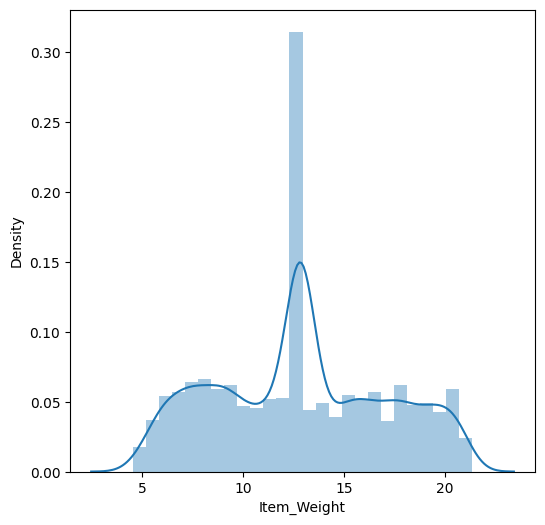

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_sales_df['Item_Weight'])
plt.show()

### Item Visibility Distribution

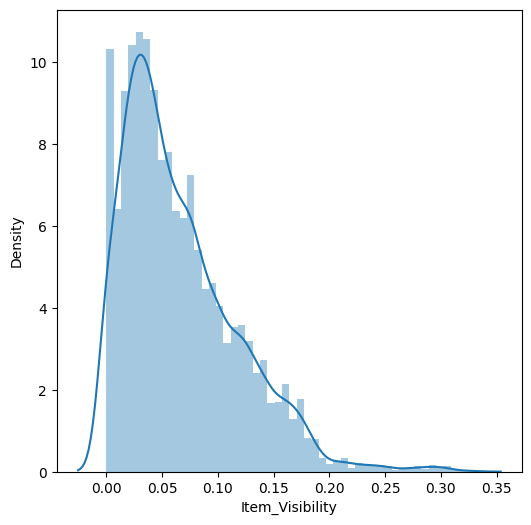

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_sales_df['Item_Visibility'])
plt.show()

### Item MRP Distribution

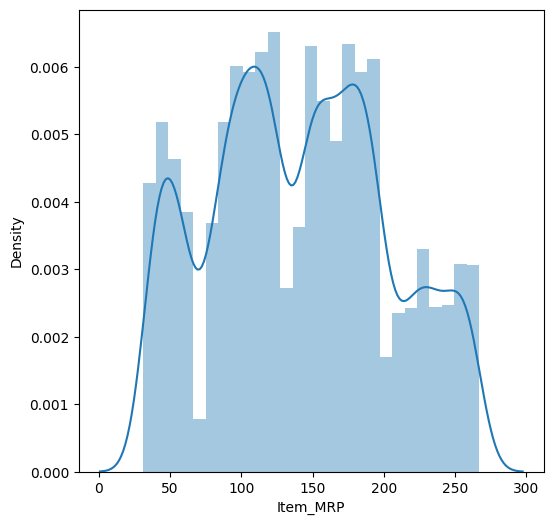

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_sales_df['Item_MRP'])
plt.show()

### Item Outlet Sales Distribution

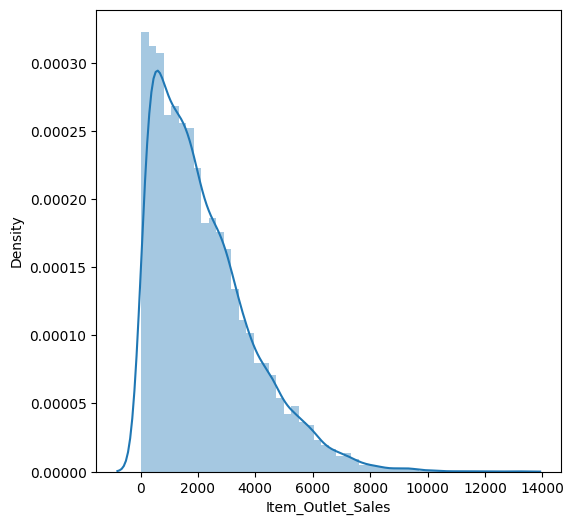

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_sales_df['Item_Outlet_Sales'])
plt.show()

### Outlet Establishment Year

In [ ]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

### Encoding the Categorical Features

In [19]:
# encoding sex column
medical_insurance_df.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
medical_insurance_df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
medical_insurance_df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [20]:
medical_insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


## 6) Model Building
---

### Creating Feature Matrix (Independent Variables) & Target Variable (Dependent Variable)

In [21]:
# separating the data and labels
X = medical_insurance_df.drop(columns = ['charges'], axis=1) # Feature matrix
y = medical_insurance_df['charges'] # Target variable

In [22]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [23]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Data Standardization

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [25]:
scaler.fit(X)

StandardScaler()

In [26]:
standardized_data = scaler.transform(X)

In [27]:
standardized_data

array([[-1.43876426,  1.0105187 , -0.45332   , -0.90861367, -1.97058663,
        -0.40328924],
       [-1.50996545, -0.98959079,  0.5096211 , -0.07876719,  0.5074631 ,
        -1.28788104],
       [-0.79795355, -0.98959079,  0.38330685,  1.58092576,  0.5074631 ,
        -1.28788104],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , -0.90861367,  0.5074631 ,
        -1.28788104],
       [-1.29636188,  1.0105187 , -0.79781341, -0.90861367,  0.5074631 ,
        -0.40328924],
       [ 1.55168573,  1.0105187 , -0.26138796, -0.90861367, -1.97058663,
         1.36589436]])

In [28]:
X = standardized_data

In [29]:
X

array([[-1.43876426,  1.0105187 , -0.45332   , -0.90861367, -1.97058663,
        -0.40328924],
       [-1.50996545, -0.98959079,  0.5096211 , -0.07876719,  0.5074631 ,
        -1.28788104],
       [-0.79795355, -0.98959079,  0.38330685,  1.58092576,  0.5074631 ,
        -1.28788104],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , -0.90861367,  0.5074631 ,
        -1.28788104],
       [-1.29636188,  1.0105187 , -0.79781341, -0.90861367,  0.5074631 ,
        -0.40328924],
       [ 1.55168573,  1.0105187 , -0.26138796, -0.90861367, -1.97058663,
         1.36589436]])

### Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [32]:
print(y.shape, y_train.shape, y_test.shape)

(1338,) (1070,) (268,)


### Model Comparison : Training & Evaluation

In [33]:
# For Model Building
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
models = [LinearRegression, Lasso, Ridge, SVR, DecisionTreeRegressor, RandomForestRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    r2_scores.append(r2_score(y_test, y_pred))

In [35]:
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge", "SVR", "Decision Tree Regressor", "Random Forest Regressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,4443.153507,3.855841e+07,6209.541743,0.702062
Lasso,4442.786725,3.855646e+07,6209.385131,0.702077
Ridge,4443.686088,3.854839e+07,6208.734949,0.702140
SVR,7722.482857,1.425538e+08,11939.588349,-0.101502
Decision Tree Regressor,3154.081196,4.391679e+07,6626.974239,0.660658
Random Forest Regressor,2861.591495,2.402401e+07,4901.429708,0.814368


### Inference

In the context of medical insurance cost prediction,
- Among the models evaluated, Linear Regression, Lasso, and Ridge Regression exhibit similar levels of accuracy, with Mean Absolute Errors (MAE) around 4443 and R-squared values around 0.70. These models offer a reasonably good fit to the data and could be suitable for estimating insurance costs.
- However, the Support Vector Regressor (SVR) performs significantly worse, with a much higher MAE and a negative R-squared value, suggesting that it struggles to capture the underlying patterns in the data. Therefore, it may not be an appropriate choice for this prediction task.
- The Decision Tree Regressor and Random Forest Regressor show promising results, with lower MAE values and higher R-squared values, indicating their ability to capture complex relationships within the data. These models may offer superior performance in estimating medical insurance costs and could be worth further exploration and fine-tuning.

In summary, for medical insurance cost prediction, the **Random Forest Regressor** seems to be the most promising model, providing accurate estimates with a low MAE and a high R-squared value, making it a potential choice for practical implementation.